In [1]:
from client.minecraft_pb2 import *
from client.minecraft_pb2_grpc import *
from os import listdir
from os.path import isfile, join
import numpy as np
import torch
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
from einops import rearrange, repeat
import numpy as np
from IPython.display import clear_output
import torch
from hydra.utils import instantiate
from hydra.experimental import initialize, initialize_config_dir, compose

from artefact_nca.trainer.replication_nca_trainer import ReplicationNCATrainer
from artefact_nca.utils.minecraft import MinecraftClient, convert_to_color, Blockloader, spawn_entities
from artefact_nca.utils.minecraft.voxel_utils import replace_colors

In [2]:
### Minecraft Client

channel = grpc.insecure_channel("localhost:5001")
client = MinecraftServiceStub(channel)

In [3]:
def visualize_output(ct, out, rearrange_channels=False):
    clear_output()
    if rearrange_channels:
        out =  rearrange(out, "b c d h w -> b d h w c")
    out = rearrange(out, 'b d h w c -> b w d h c')
    argmax = np.argmax(out[:, :, :, :, :ct.num_categories], -1)
    out = replace_colors(argmax, ct.dataset.target_color_dict)[0]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.voxels(out, facecolors=out, edgecolor='k')
    
    plt.show()
    return argmax

In [4]:
base_nbt_path = "/home/kokkgoblin/Code/3d-artefacts-nca-1/artefact_nca/data/structs_dataset/nbts"

Block priority:  [179]


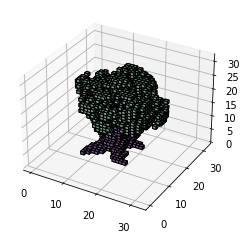

In [5]:
nbt_path = "{}/village/Extra_dark_oak.nbt".format(base_nbt_path)
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("Extra_dark_oak", nbt_path=nbt_path, load_entity_config={"padding": [[4,5], [3,4], [3,3]]
,"block_priority":[REDSTONE_BLOCK]})

color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [6]:
color_arr.shape

(32, 32, 32)

In [9]:
ct = ReplicationNCATrainer.from_config(
                    "replication_oak.yaml",
                    config={
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":True,
                        "visualize_output":True
                    }
                )

Block priority:  []


Before --- After


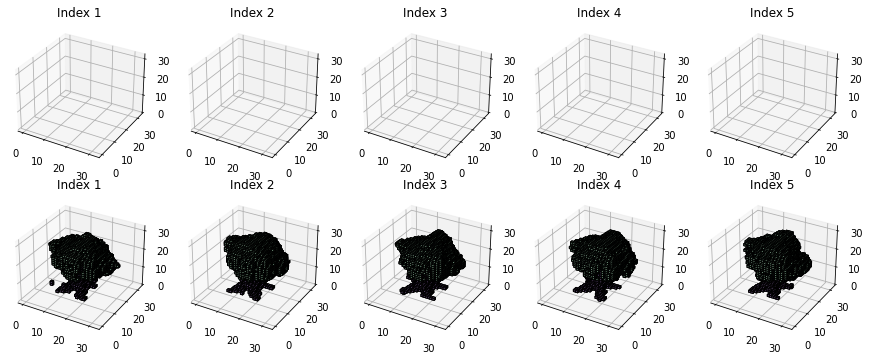

loss:0.36712098121643066--iou_loss:0.6772178411483765:   3%|▎         | 570/20000 [14:30<8:14:29,  1.53s/it] 


KeyboardInterrupt: 

In [18]:
ct.train(epochs=20000, batch_size=5, checkpoint_interval=100)

In [19]:
seed, _, _ = ct.sample_batch(1)

In [20]:
seed.size()

torch.Size([1, 32, 32, 32, 16])

In [21]:
shape = (1, 16, 32, 32, 32)

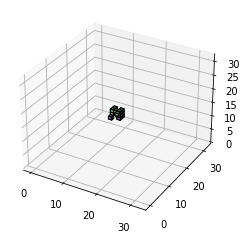

In [22]:
with torch.no_grad():
    x = ct.model(seed, steps=8, rearrange_output=False)
_ = visualize_output(ct, x.cpu().detach().numpy(), rearrange_channels=True)

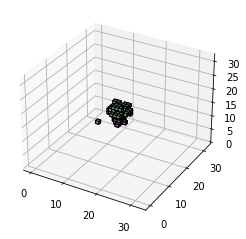

In [23]:
with torch.no_grad():
    x = ct.duplicate(x, shape)
    x = ct.model(x, steps=8, rearrange_input=False, rearrange_output=False)
_ = visualize_output(ct, x.cpu().detach().numpy(), rearrange_channels=True)

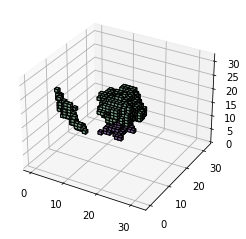

In [24]:
with torch.no_grad():
    x = ct.duplicate(x, shape)
    x = ct.model(x, steps=8, rearrange_input=False, rearrange_output=False)
_ = visualize_output(ct, x.cpu().detach().numpy(), rearrange_channels=True)

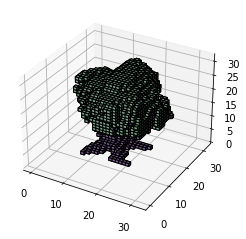

In [25]:
with torch.no_grad():
    x = ct.duplicate(x, shape)
    x = ct.model(x, steps=8, rearrange_input=False, rearrange_output=False)
_ = visualize_output(ct, x.cpu().detach().numpy(), rearrange_channels=True)

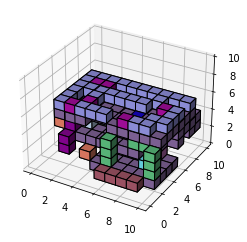

In [37]:
with torch.no_grad():
    x = ct.duplicate(x, shape)
    x = ct.model(x, steps=8, rearrange_input=False, rearrange_output=False)
_ = visualize_output(ct, x.cpu().detach().numpy(), rearrange_channels=True)

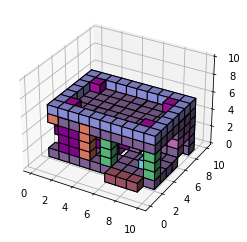

In [38]:
with torch.no_grad():
    x = ct.duplicate(x, shape)
    x = ct.model(x, steps=8, rearrange_input=False, rearrange_output=False)
_ = visualize_output(ct, x.cpu().detach().numpy(), rearrange_channels=True)